<h1>Multiple Linear Regression</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MaxAbsScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<h2>Import & Explore The Dataset</h2>

In [ ]:
!wget -O BostonHousePrices.csv https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2025-02-04 09:50:48--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousePrices.csv’

BostonHousePrices.c 100%[===================>]  34.90K  --.-KB/s    in 0.04s   

2025-02-04 09:50:49 (837 KB/s) - ‘BostonHousePrices.csv’ saved [35735/35735]



In [ ]:
df = pd.read_csv('BostonHousePrices.csv')
df[::50]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4


<h2>Columns in the Boston Housing Dataset
This dataset includes the following:</h2>

- **CRIM**: *Per capita crime rate by town.*
- **ZN**: *Proportion of residential land zoned for lots over 25,000 sq. ft.*
- **INDUS**: *Proportion of non-retail business acres per town.*
- **CHAS**: *Charles River dummy variable (1 if tract bounds river; 0 otherwise).*
- **NOX**: *Nitric oxides concentration (parts per 10 million).*
- **RM**: *Average number of rooms per dwelling.*
- **AGE**: *Proportion of owner-occupied units built before 1940.*
- **DIS**: *Weighted distances to five Boston employment centers.*
- **RAD**: *Index of accessibility to radial highways.*
- **TAX**: *Full-value property tax rate per $10,000.*

- **PTRATIO**: *Pupil-teacher ratio by town.*
- **B**: *1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town.*
- **LSTAT**: *% lower status of the population.*
- **MEDV**: *Median value of owner-occupied homes in $1000s (our target variable).*



In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


<h2>Checking Outliers</h2>

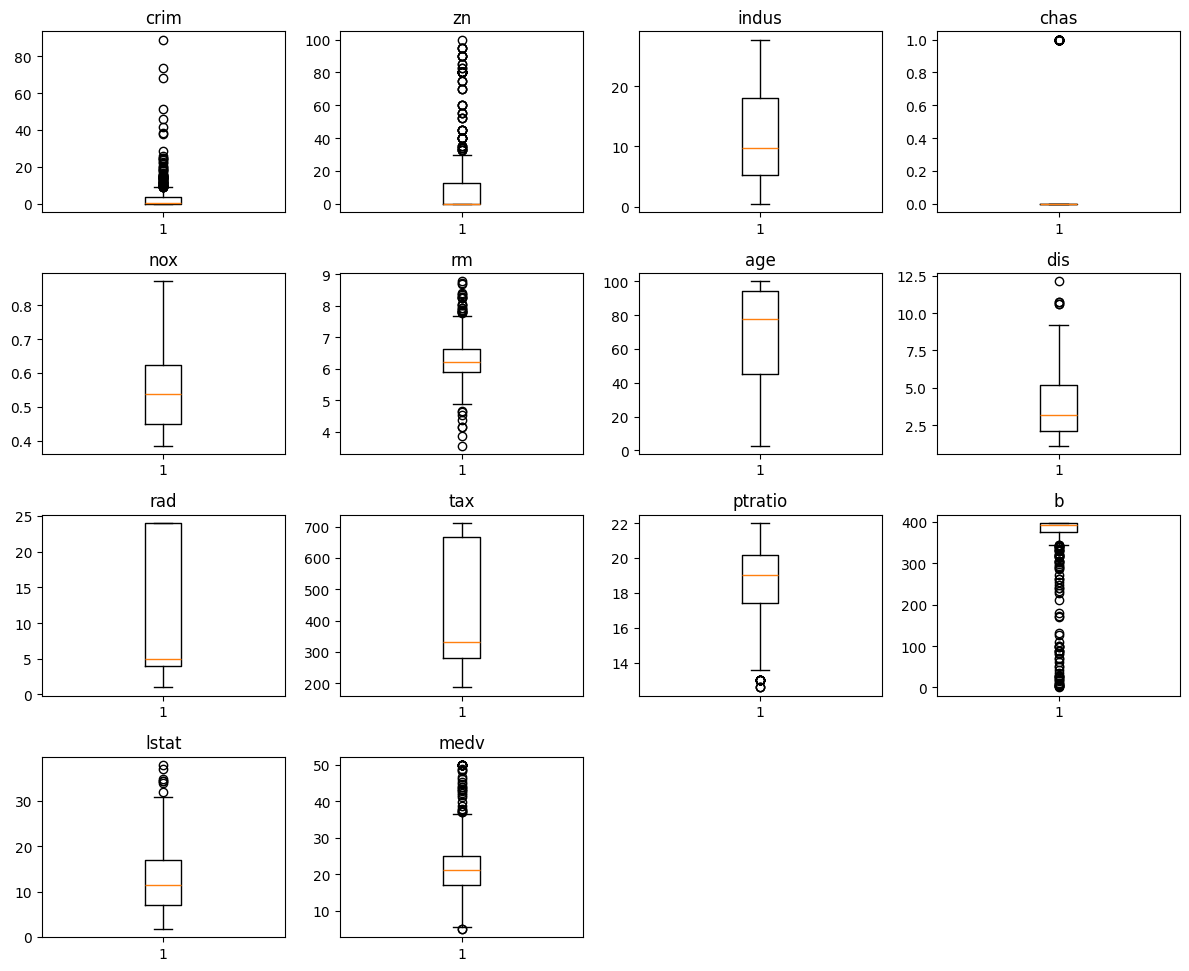

In [ ]:
# Features to check for outliers
features = [col for col in df.columns]

n_features = len(features)
n_cols = 4
n_rows = (n_features // n_cols) + (n_features % n_cols)

plt.figure(figsize=(12,12))
for i, feature in enumerate(features, 1):
  plt.subplot(n_rows, n_cols, i)
  plt.boxplot(df[feature])
  plt.title(feature)

plt.tight_layout()
plt.show()

<h2>Finding Co-Relation</h2>

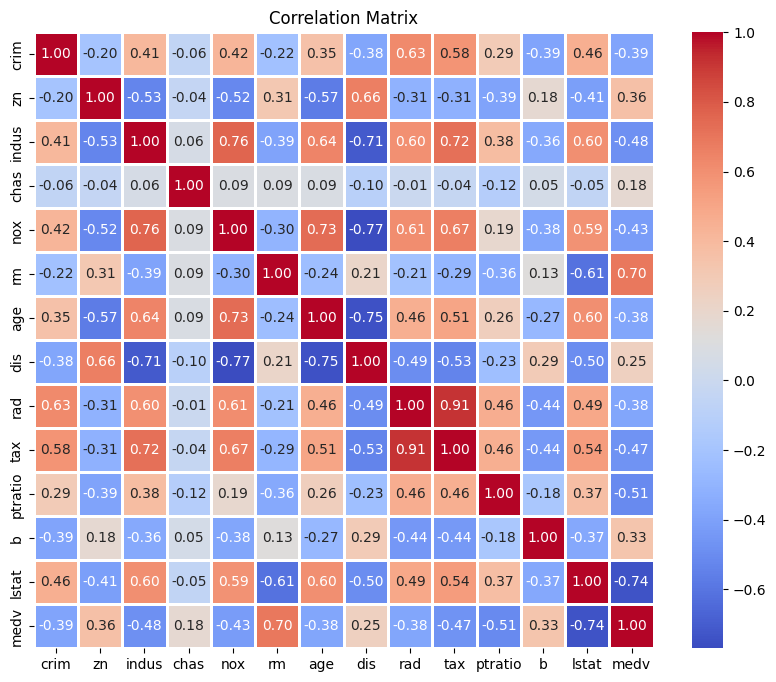


Features Most Correlated with MEDV: 
medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths = 1, fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

print('\nFeatures Most Correlated with MEDV: ')
print(corr_matrix['medv'].sort_values(ascending = False))

<h2>Feature Selection</h2>

In [ ]:
selected_features = corr_matrix['medv'][abs(corr_matrix['medv']) > 0.4].index.tolist()
selected_features.remove('medv')
selected_features

['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat']

<h2>Handling Multicollinearity</h2>


In [ ]:
filter_corr_matrix = df[selected_features].corr()

high_corr_pairs = []
for i in range(len(filter_corr_matrix.columns)):
  for j in range(i):
    # print(filter_corr_matrix.columns[i], filter_corr_matrix.columns[j])
    if abs(filter_corr_matrix.iloc[i, j]) > 0.8:
      high_corr_pairs.append((filter_corr_matrix.columns[i], filter_corr_matrix.columns[j]))

for feature1, feature2 in high_corr_pairs:
  if feature1 in selected_features:
    selected_features.remove(feature1)

selected_features

['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat']

<h2>Feature Engineering</h2>

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_feature = poly.fit_transform(df[['rm']])

df['rm^2'] = poly_feature[:, 1]
selected_features.append('rm^2')

print(selected_features)
df.head()

['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat', 'rm^2']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,rm^2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,43.230625
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,41.229241
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,51.624225
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,48.972004
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,51.079609


<h2>Feature Engineering (Manual)</h2>

In [ ]:
df['rm^2'] = df['rm'] ** 2
selected_features.append('rm^2')

<h2>Data Preparation</h2>

In [ ]:
X = df[selected_features]
Y = df['medv']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# pd.DataFrame(np.hstack([X, Y.values.reshape(-1, 1)]), columns = list(X.columns) + ['medv'])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 7)
(404,)
(102, 7)
(102,)


<h2>Features Scaling</h2>

- <h3>Z-score Standardization</h3>

$$ \vec{X} = \frac{\vec{X} - \mu}{\sigma} $$
<h4>where:</h4>

* $\vec{X}$ : Input feature vector
* $\mu$ : Mean of the feature
* $\sigma$ : Standard deviation of the feature
This formula standardizes the features by subtracting the mean ($\mu$) and dividing by the standard deviation ($\sigma$), resulting in features with zero mean and unit variance.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


- <h3>Z-score Standardization Manual</h3>

In [ ]:
X_train_mean = X_train.mean(axis = 0)
X_test_mean = X_test.mean(axis = 0)
X_train_std = X_train.std(axis = 0)
X_test_std = X_test.std(axis = 0)

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_test_mean) / X_test_std

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


- <h3>Max Normalization Manual</h3>

$$ \vec{X} = \frac{\vec{X}}{\max(\vec{X})} $$
<h4>where:</h4>

* $\vec{X}$ : Input feature vector
* $\max(\vec{X})$ : Max of the feature


In [ ]:
X_train_max = X_train.max(axis = 0)
X_test_max = X_test.max(axis = 0)

X_train_scaled = X_train / X_train_max
X_test_scaled = X_test / X_test_max

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


- <h3>MaxAbs Normalization</h3>

$$ \vec{X} = \frac{\vec{X}}{\max(|\vec{X}|)} $$
<h4>where:</h4>

* $\vec{X}$ : Input feature vector
* $\max(|\vec{X}|)$ : Max Abs of the feature


In [ ]:
scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


- <h3>Mean Normalization Manual</h2>

$$ \vec{X} = \frac{\vec{X} - \mu}{\max(\vec{X}) - \min(\vec{X})} $$
<h4>where:</h4>

* $\vec{X}$ : Input feature vector
* $\mu$ : Mean of the feature
* $\max(\vec{X})$ : Max of the feature
* $\min(\vec{X})$ : Min of the feature

In [ ]:
X_train_mean = X_train.mean(axis = 0)
X_test_mean = X_test.mean(axis = 0)
X_train_min = X_train.min(axis = 0)
X_test_min = X_test.min(axis = 0)
X_train_max = X_train.max(axis = 0)
X_test_max = X_test.max(axis = 0)

X_train_scaled = (X_train - X_train_mean) / (X_train_max - X_train_min)
X_test_scaled = (X_test - X_test_mean) / (X_test_max - X_test_min)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


- <h3>Min - Max Normalization</h3>

$$ \vec{X} = \frac{\vec{X} - \min(\vec{X})}{\max(\vec{X}) - \min(\vec{X})} $$
<h4>where:</h4>

* $\vec{X}$ : Input feature vector
* $\max(\vec{X})$ : Max of the feature
* $\min(\vec{X})$ : Min of the feature

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


- <h3>Min - Max Normalization Manual</h2>

In [ ]:
X_train_min = X_train.min(axis = 0)
X_test_min = X_test.min(axis = 0)
X_train_max = X_train.max(axis = 0)
X_test_max = X_test.max(axis = 0)

X_train_scaled = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test_scaled = (X_test - X_test_min) / (X_test_max - X_test_min)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


 - <h3>RobustScaler Normalization</h3>

$$ \vec{X} = \frac{\vec{X} - median(\vec{X})}{IQR(\vec{X})} $$
<h4>where:</h4>

* $\vec{X}$ : Input feature vector
* $median(\vec{X})$ : Median value of the feature
* $IQR(\vec{X})$ : Interquartile Range (difference between the 75th and 25th percentiles)

In [ ]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 7)
(102, 7)


<h2>Model and its Parameters</h2>

$$ F_{\vec{w},b}(\vec{X}) = \vec{w}.\vec{X} + b $$

<h4>where:</h4>

* $F_{\vec{w},b}(\vec{X})$ : Prediction function
* $\vec{w}$ : Weights of features (coefficient)
* $\vec{X}$ : Input feature vector
* $b$ : Bias (intercept)


In [ ]:
W = np.zeros(X_train_scaled.shape[1])
b = 0

def predict(X, W, b):
    return np.dot(X, W) + b

<h2>Cost Functions</h2>

$$ J(\vec{w},b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 $$

<h4>where:</h4>

* $J(\vec{w},b)$ : Cost function that measures the error between predictions and actual values
* $m$ : Total number of training examples
* $\hat{y}^{(i)}$ : Predicted value for the i-th training example
* $y^{(i)}$ : Actual value for the i-th training example
* $\frac{1}{2m}$ : Scaling factor that computes the average and makes derivatives cleaner
* $(\hat{y}^{(i)} - y^{(i)})^2$ : Squared difference between predicted and actual values

In [ ]:
def compute_cost(Y, predictions):
    m = Y.shape[0]
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

<h2>Implement Gradient Descent</h2>

$$ \vec{w} := \vec{w} - \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}, \quad b := b - \alpha \frac{\partial J(\vec{w},b)}{\partial b} $$

<h4>where:</h4>

* $\vec{w}$ : Weights (coefficients) that is being optimized
* $b$ : Bias (intercept) that is being optimized
* $\alpha$ : Learning rate, controls the step size in each iteration
* $J(\vec{w},b)$ : Cost function, typically Mean Squared Error (MSE), given by:
  $$
  J(\vec{w},b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
  $$
* $\frac{\partial J(\vec{w},b)}{\partial \vec{w}}$ : Partial derivative of the cost function with respect to $w$, given by:
  $$
  \frac{\partial J(\vec{w},b)}{\partial \vec{w}} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \vec{X}^{(i)}
  $$
* $\frac{\partial J(\vec{w},b)}{\partial b}$ : Partial derivative of the cost function with respect to $b$, given by:
  $$
  \frac{\partial J(\vec{w},b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
  $$

In these equations:
- $\hat{y}^{(i)} = \vec{w} . \vec{X}^{(i)} + b$ : is the predicted value for the $i$-th training example.
- $y^{(i)}$ : is the actual value for the $i$-th training example.
- $\vec{X}^{(i)}$ : is the input feature vector for the $i$-th training example.
- $m$ : is the total number of training examples.

The update rules use the gradients of the cost function with respect to ($\vec{w}$) and ($b$) to iteratively improve the values of ($\vec{w}$) and ($b$) by moving in the opposite direction of the gradient, scaled by the learning rate ($\alpha$).


In [ ]:
def gradient_descent(X, Y, W, b, learning_rate, iterations):
    m = Y.shape[0]

    for i in range(iterations):
      predictions = predict(X, W, b)

      dw = (1 / m) * np.dot(X.T, (predictions - Y))
      db = (1 / m) * np.sum(predictions - Y)

      W -= learning_rate * dw
      b -= learning_rate * db

      if i % 100 == 0:
            print(f"Iteration {i}: Cost {compute_cost(Y, predictions)}")

    return W, b

<h2>Setting Hyperparameters and Training</>

In [ ]:
#set hyperparameters
learning_rate = 0.5
iterations = 3000

#train model
W, b = gradient_descent(X_train_scaled, Y_train, W, b, learning_rate, iterations)

#print final parameters
print(f"Final parameters: W = {W}, b = {b}")

Iteration 0: Cost 303.277698019802
Iteration 100: Cost 11.996782927370559
Iteration 200: Cost 11.360101791957884
Iteration 300: Cost 10.958201248721986
Iteration 400: Cost 10.704396715516241
Iteration 500: Cost 10.544116410814874
Iteration 600: Cost 10.442897666804736
Iteration 700: Cost 10.378976936443765
Iteration 800: Cost 10.338610304652025
Iteration 900: Cost 10.31311834057389
Iteration 1000: Cost 10.297019889855646
Iteration 1100: Cost 10.28685354430716
Iteration 1200: Cost 10.280433387260995
Iteration 1300: Cost 10.276378988726053
Iteration 1400: Cost 10.273818592249471
Iteration 1500: Cost 10.272201674213218
Iteration 1600: Cost 10.271180573004921
Iteration 1700: Cost 10.270535736560392
Iteration 1800: Cost 10.270128515379174
Iteration 1900: Cost 10.269871350803811
Iteration 2000: Cost 10.269708948596188
Iteration 2100: Cost 10.269606389847558
Iteration 2200: Cost 10.269541622889804
Iteration 2300: Cost 10.269500721856271
Iteration 2400: Cost 10.269474892411719
Iteration 2500: 

<h2>Model Evaluation</>

In [ ]:
predictions = predict(X_test_scaled, W, b)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 21.010434035299554
Mean Absolute Error: 3.0972327077524975
R-squared: 0.7134958387546111


<h2>Plot Result</>

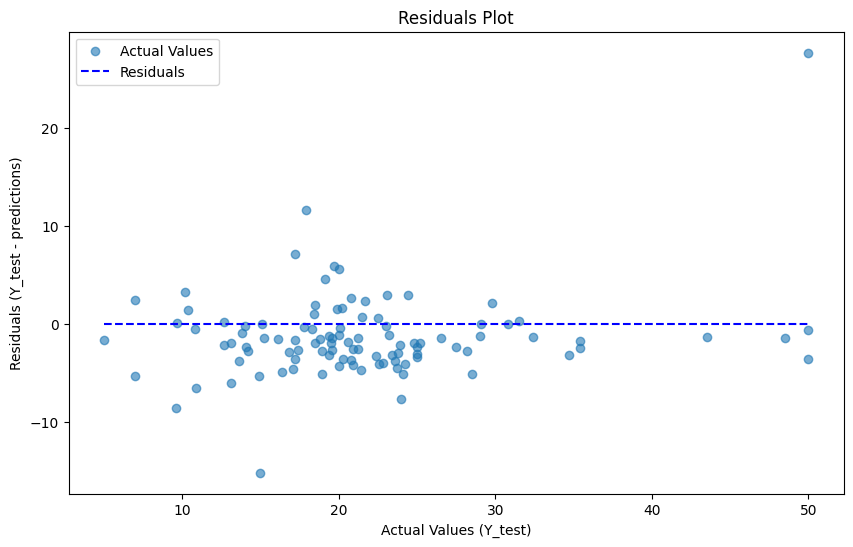

In [ ]:
residuals = Y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, alpha = 0.6, label = 'Actual Values')
plt.hlines(0, Y_test.min(), Y_test.max(), colors = 'blue', linestyles = '--', label = 'Residuals')
plt.legend()
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Residuals (Y_test - predictions)")
plt.title("Residuals Plot")
plt.show()

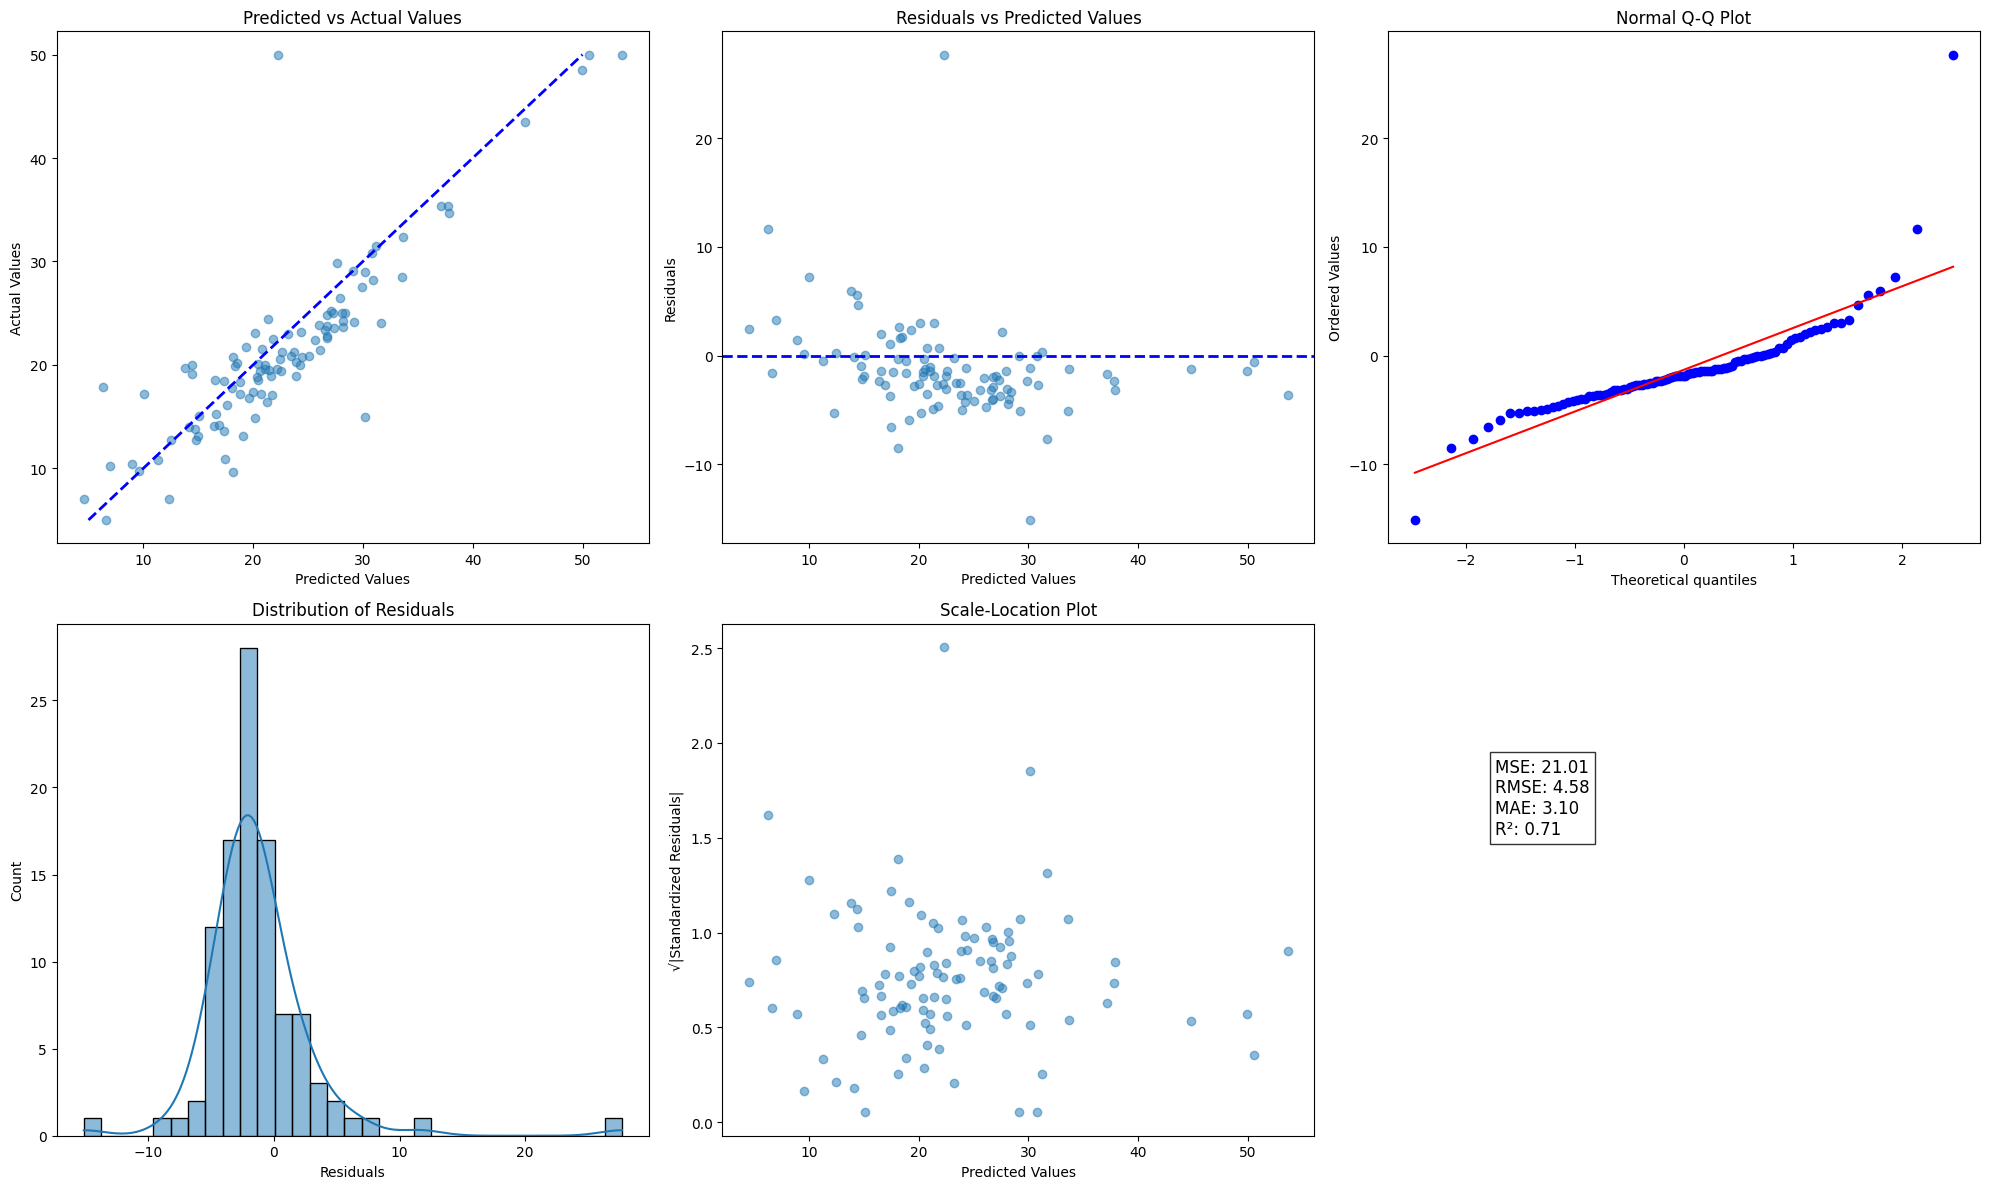

In [ ]:
fig = plt.figure(figsize=(20, 12))

# 1. Predicted vs Actual Values
ax1 = plt.subplot(2, 3, 1)
plt.scatter(predictions, Y_test, alpha = 0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--', lw = 2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')

# 2. Residuals vs Predicted Values
ax2 = plt.subplot(2, 3, 2)
plt.scatter(predictions, residuals, alpha = 0.5)
plt.axhline(0, color = 'b', linestyle = '--', lw = 2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 3. QQ Plot
ax3 = plt.subplot(2, 3, 3)
stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title('Normal Q-Q Plot')

# 4. Residuals Distribution
ax4 = plt.subplot(2, 3, 4)
sns.histplot(residuals, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

# 5. Scale-Location Plot
ax5 = plt.subplot(2, 3, 5)
plt.scatter(predictions, np.sqrt(np.abs(residuals / residuals.std())), alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot')

# Calculate and display performance metrics
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Add text box with metrics
metrics_text = f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}'
plt.figtext(0.75, 0.3, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

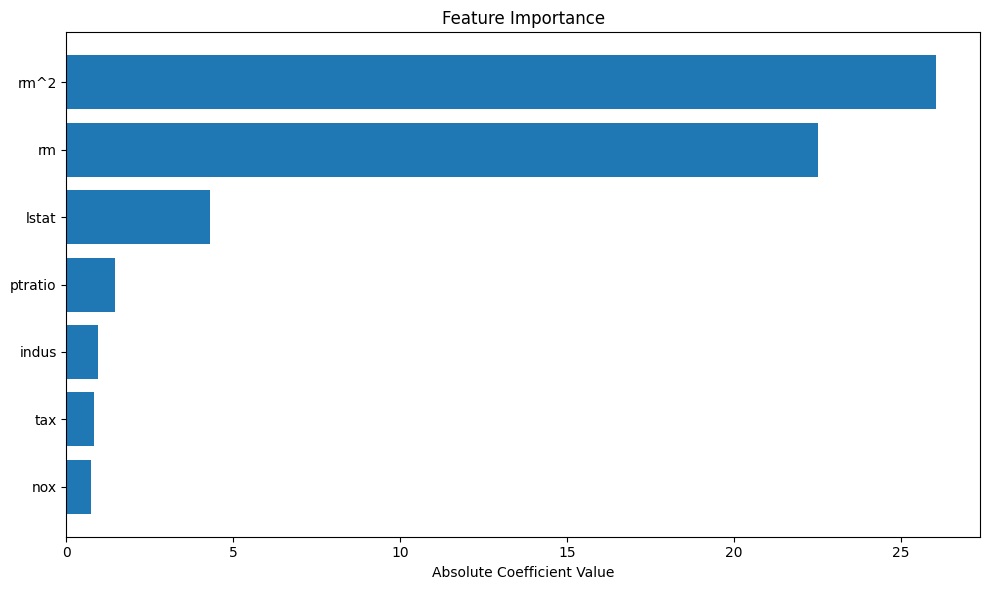

In [ ]:
importance = np.abs(W)
sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize = (10, 6))
plt.barh(pos, importance[sorted_idx])
plt.yticks(pos, np.array(selected_features)[sorted_idx])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
print(importance)
print(sorted_idx)
print(pos)

[ 0.95828355  0.73511141 22.35904482  0.82122089  1.46975098  4.31545248
 25.90468662]
[1 3 0 4 5 2 6]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5]


In [ ]:
print(W)
print(b)

[  0.95828355  -0.73511141 -22.35904482  -0.82122089  -1.46975098
  -4.31545248  25.90468662]
22.796534653465347


<h2>Using Sci-kitlearn Linear Model</h2>

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient: [  1.80416087  -1.12320265 -23.77924014  -1.91324421  -2.23728676
  -5.8336955   26.36179854]
Intercept: 21.83935205927627


In [ ]:
predictions = model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 17.911286058805633
Mean Absolute Error: 2.6047682218251795
R-squared: 0.7557566882967455


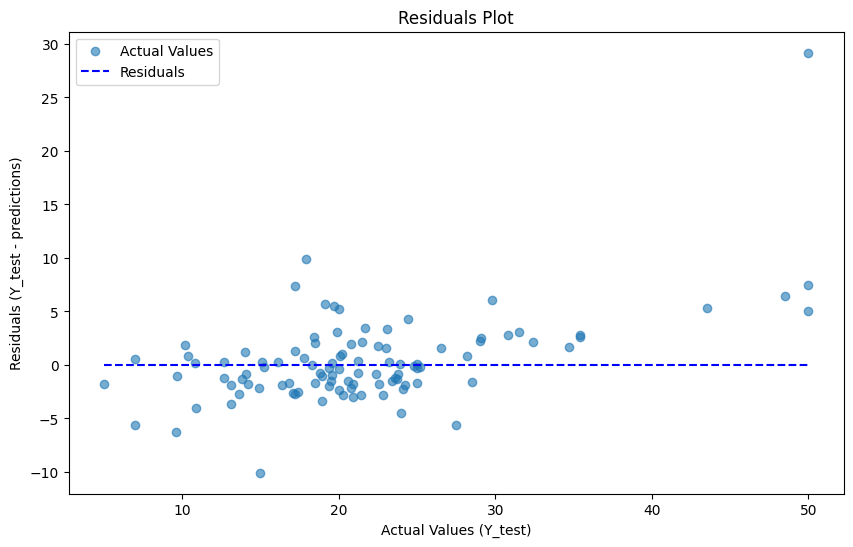

In [ ]:
residuals = Y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, alpha = 0.6, label = 'Actual Values')
plt.hlines(0, Y_test.min(), Y_test.max(), colors = 'blue', linestyles = '--', label = 'Residuals')
plt.legend()
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Residuals (Y_test - predictions)")
plt.title("Residuals Plot")
plt.show()

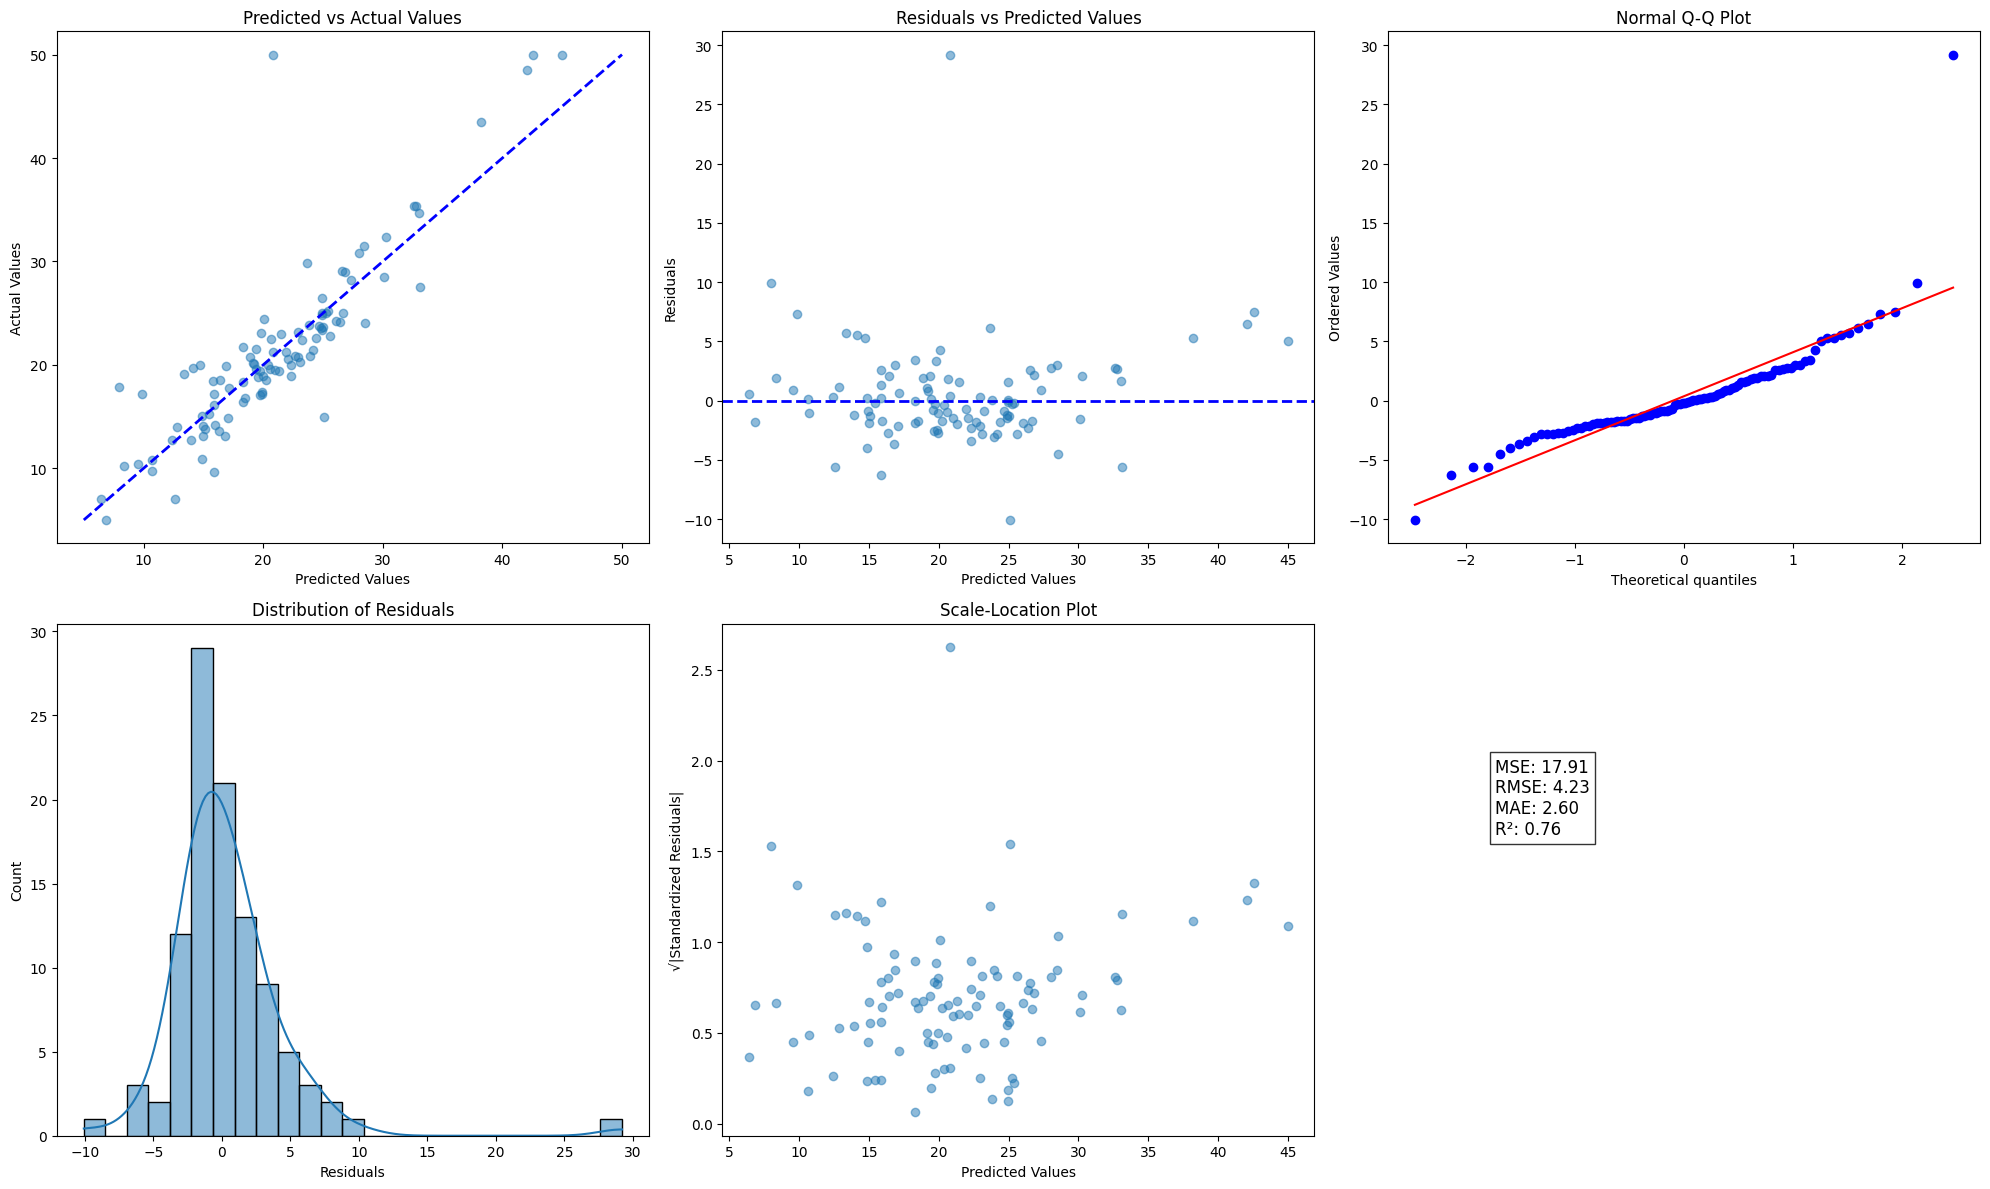

In [ ]:
fig = plt.figure(figsize=(20, 12))

# 1. Predicted vs Actual Values
ax1 = plt.subplot(2, 3, 1)
plt.scatter(predictions, Y_test, alpha = 0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--', lw = 2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')

# 2. Residuals vs Predicted Values
ax2 = plt.subplot(2, 3, 2)
plt.scatter(predictions, residuals, alpha = 0.5)
plt.axhline(0, color = 'b', linestyle = '--', lw = 2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 3. QQ Plot
ax3 = plt.subplot(2, 3, 3)
stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title('Normal Q-Q Plot')

# 4. Residuals Distribution
ax4 = plt.subplot(2, 3, 4)
sns.histplot(residuals, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

# 5. Scale-Location Plot
ax5 = plt.subplot(2, 3, 5)
plt.scatter(predictions, np.sqrt(np.abs(residuals / residuals.std())), alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot')

# Calculate and display performance metrics
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Add text box with metrics
metrics_text = f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}'
plt.figtext(0.75, 0.3, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

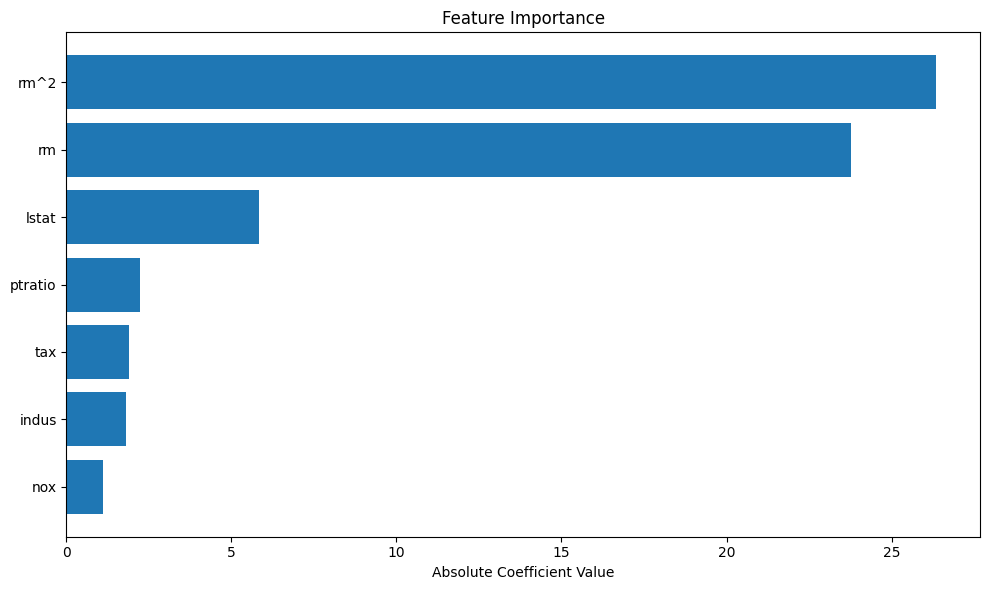

In [ ]:
importance = np.abs(model.coef_)
sorted_idx = np.argsort(importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize = (10, 6))
plt.barh(pos, importance[sorted_idx])
plt.yticks(pos, np.array(selected_features)[sorted_idx])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()